<a href="https://colab.research.google.com/github/Joothis/Cat-Dog-Classifier/blob/main/Cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install tensorflow.keras
!pip install tensorflow.keras.models
!pip install tensorflow.keras.layers
!pip install tensorflow.keras.preprocessing.image
!pip install pillow
!pip install matplotlib
!pip install numpy

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

import zipfile
import os


with zipfile.ZipFile("/content/Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

for root, dirs, files in os.walk("dataset"):
    for file in files:
        print(os.path.join(root, file))


In [5]:

batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    '/content/dataset/Dataset/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    '/content/dataset/Dataset/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    '/content/dataset/Dataset/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Dog vs Cat)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
epochs = 15
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.5326 - loss: 0.7517 - val_accuracy: 0.5675 - val_loss: 0.6750
Epoch 2/15


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.6404 - loss: 0.6388 - val_accuracy: 0.6387 - val_loss: 0.6357
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.6976 - loss: 0.5763 - val_accuracy: 0.7217 - val_loss: 0.5471
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.7512 - loss: 0.5055 - val_accuracy: 0.7118 - val_loss: 0.5618
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.7968 - loss: 0.4433 - val_accuracy: 0.7548 - val_loss: 0.5229
Epoch 10/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
251/25

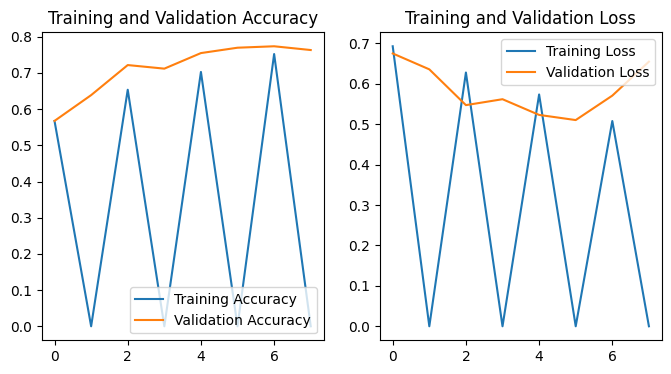

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

min_epochs = min(len(acc), len(val_acc), len(loss), len(val_loss))
epochs_range = range(min_epochs)


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:min_epochs], label='Training Accuracy')
plt.plot(epochs_range, val_acc[:min_epochs], label='Validation Accuracy')



plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:min_epochs], label='Training Loss')
plt.plot(epochs_range, val_loss[:min_epochs], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [18]:

probabilities = model.predict(test_data_gen)
probabilities = probabilities.flatten()

def plotImages(images, probabilities):
    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    for img, prob, ax in zip(images, probabilities, axes):
        ax.imshow(img)
        ax.set_title(f"{prob:.2f}")
        ax.axis('off')
    plt.show()




64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 554ms/step


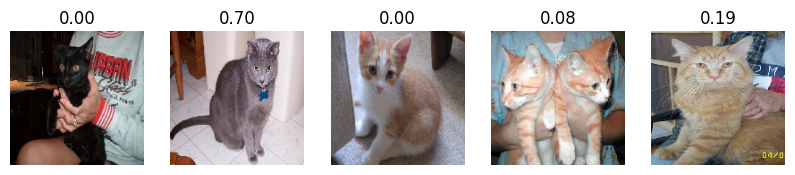

In [23]:
test_images = next(test_data_gen)
plotImages(test_images[:5], probabilities[:5])
